# 1.DATA VISUALIZATION

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
custom = ["purple","orange","red","blue","black","green"]
sns.set_palette(custom)
sns.set_style("whitegrid")
sns.set_context("notebook")

In [3]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

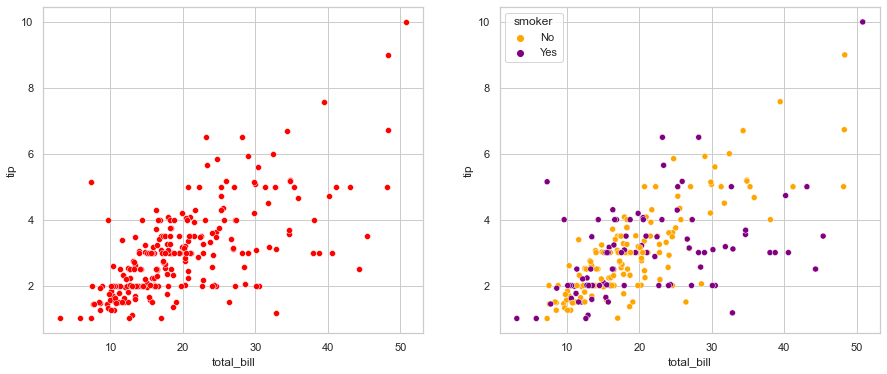

In [4]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
sns.scatterplot(x='total_bill', y='tip',  data=tips, color="red", ax=ax1)
sns.scatterplot(x='total_bill', y='tip', hue='smoker', data=tips, hue_order = ["No","Yes"],
                palette = {'No': 'orange','Yes': 'purple'}, ax=ax2) 
#scatterplot -> nokta grafiği + hue ile kategorik olarak renklendirme

<AxesSubplot:xlabel='sex', ylabel='count'>

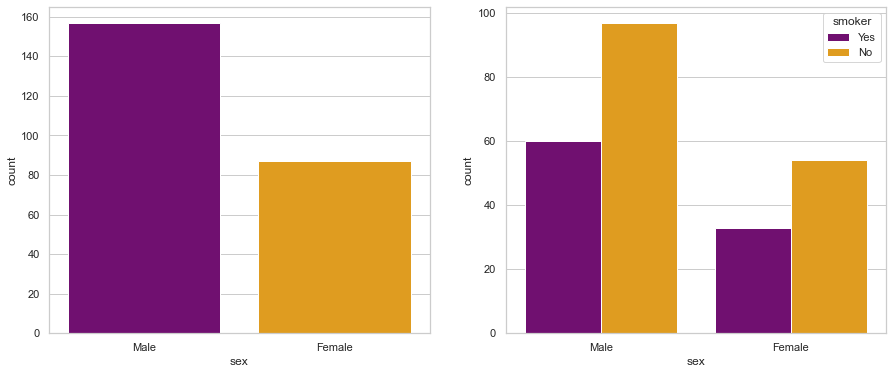

In [5]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
sns.countplot(x='sex', data=tips, ax=ax1)
sns.countplot(x='sex', hue='smoker' , data=tips, ax=ax2)
#countplot -> kategorik sayım grafik çizimi

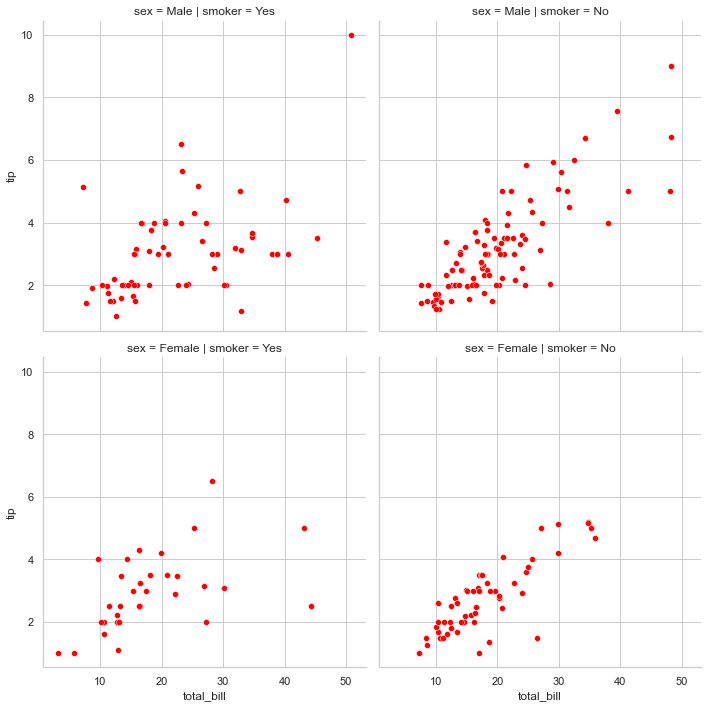

In [6]:
sns.relplot(x='total_bill', y='tip', data=tips, kind='scatter', col='smoker', row='sex', color="red")
#relplot -> aynı anda birden fazla grafik çizimi

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

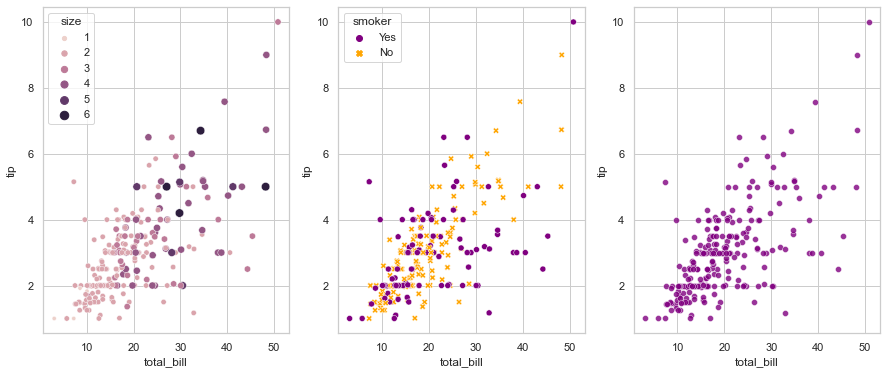

In [7]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15,6))

sns.scatterplot(x='total_bill', y='tip',  data=tips,  hue='size', size='size', ax=ax1)
#size -> noktaların boyutunu değiştiriyor
sns.scatterplot(x='total_bill', y='tip',  data=tips, hue='smoker', style='smoker', ax=ax2)
#style -> noktaların şeklini değiştiriyor
sns.scatterplot(x='total_bill', y='tip',  data=tips, alpha=0.8, ax=ax3)
#alpha -> noktaların şeffaflığını değiştiriyor

In [8]:
mpg = pd.read_csv('mpg.csv')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


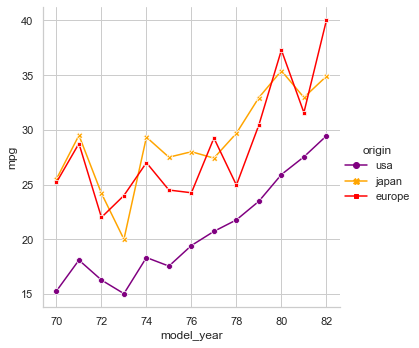

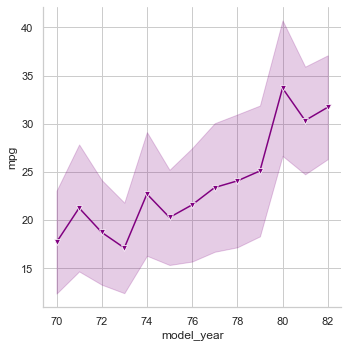

In [9]:
sns.relplot(x='model_year', y='mpg', data=mpg, kind='line',hue='origin', ci=None, style='origin', markers=True, 
            dashes=False)
plt.show() 
sns.relplot(x='model_year', y='mpg', data=mpg, kind='line', marker='v', ci='sd')
plt.show()
#hue -> türe göre ayırıyor
#ci -> güven aralığını kaldırıyor
#style -> her türü farklı şekilde grafiğe aktarıyor
#markers -> nokta olarak değeri gösteriyor
#dashes -> her türü aynı şekilde grafiğe çeviriyor X opposite style

In [10]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


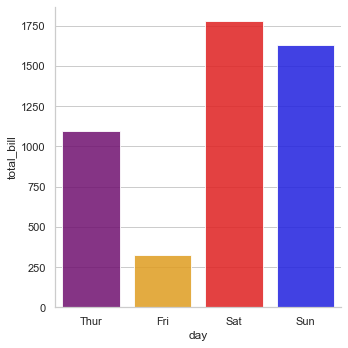

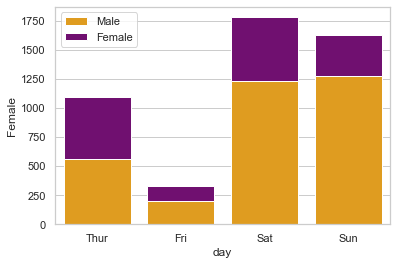

In [11]:
day_total_bill = tips.groupby('day')['total_bill'].sum().reset_index()
sns.catplot(x='day',y='total_bill', data=day_total_bill, kind='bar', ci=None, alpha=0.85)
plt.show()

crosstab_sex = pd.crosstab(tips['day'], tips['sex'], values=tips['total_bill'], aggfunc='sum' ).reset_index()
sns.barplot(x='day', y='Male', data=crosstab_sex,  ci=None, color='orange', label="Male")
sns.barplot(x='day', y='Female', data=crosstab_sex,  ci=None, bottom=crosstab_sex['Male'], color='purple', label="Female")
plt.legend()
plt.show()

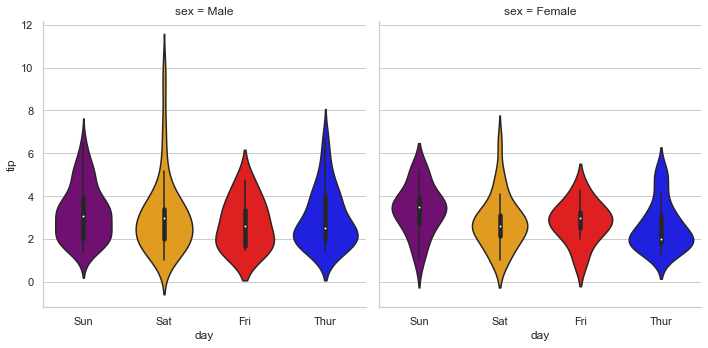

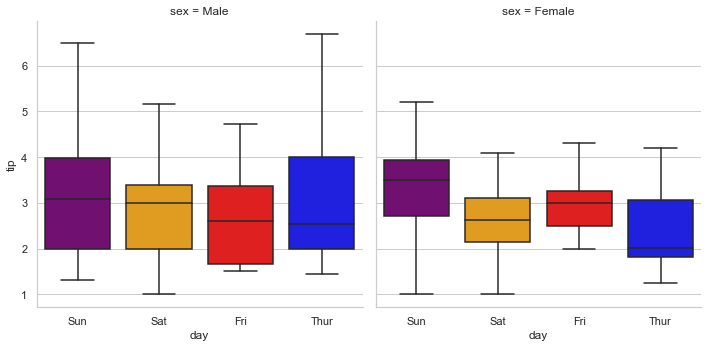

In [12]:
sns.catplot(x='day',y='tip',data=tips,kind='violin', order=['Sun','Sat','Fri','Thur'], sym="", col="sex")
plt.show() #ViolinPlot -> sym -> outlierları atıyor
sns.catplot(x='day',y='tip',data=tips,kind='box', order=['Sun','Sat','Fri','Thur'], sym="", col="sex")
plt.show() #BoxPlot -> sym -> outlierları atıyor

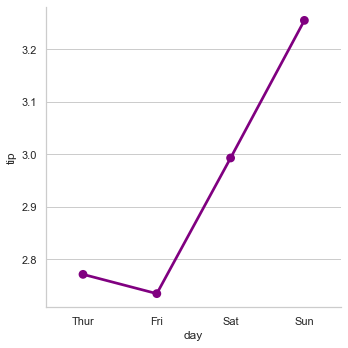

In [13]:
sns.catplot(x='day',y='tip',data=tips,kind='point', ci=None)
plt.show() 

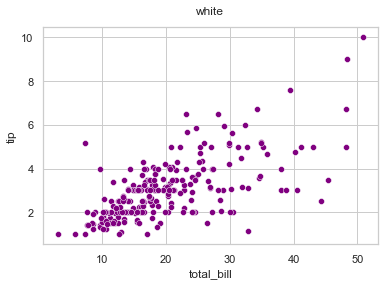

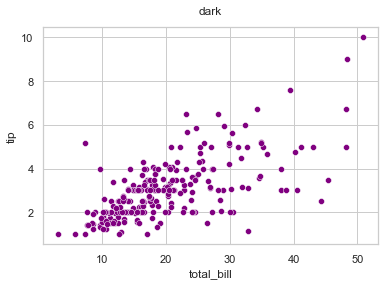

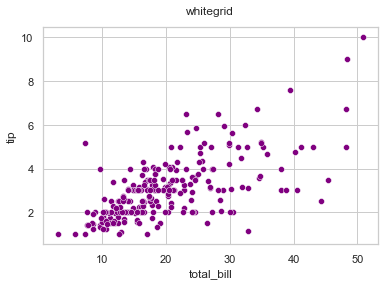

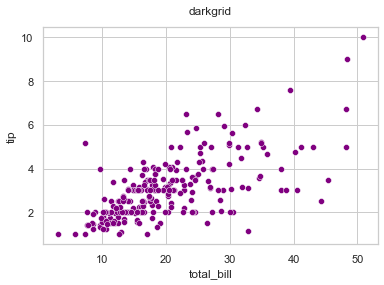

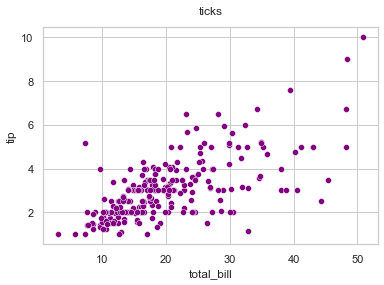

In [14]:
for style in ["white","dark","whitegrid","darkgrid","ticks"]:
    #sns.set_style(style)
    g=sns.scatterplot(x='total_bill', y='tip',  data=tips)
    g.set_title(style, y=1.03)
    plt.show() #Arkaplanı değiştiriyor

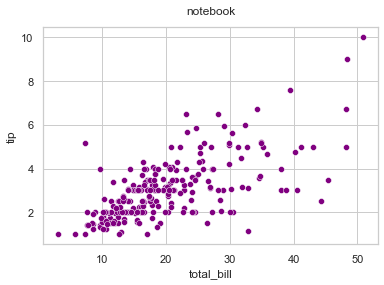

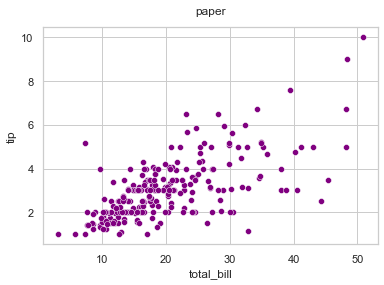

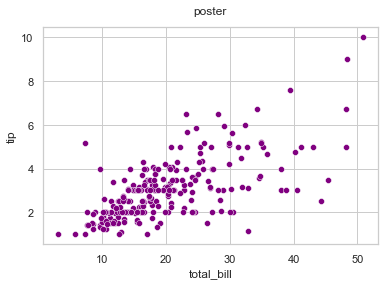

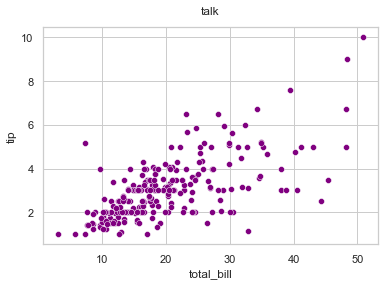

In [15]:
for style in ["notebook","paper","poster","talk"]: 
    #sns.set_context("paper")
    g=sns.scatterplot(x='total_bill', y='tip',  data=tips)
    g.set_title(style, y=1.03)
    plt.show() #grafik görünüşlerini etkiliyor

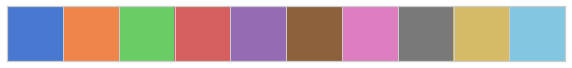

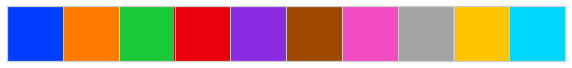

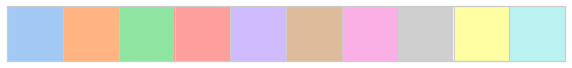

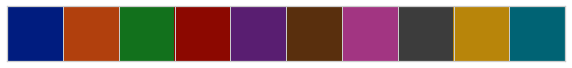

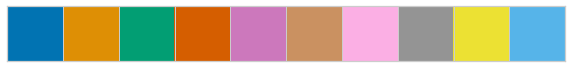

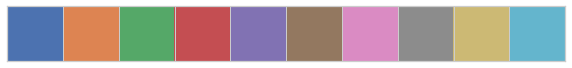

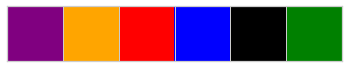

In [16]:
custom = ["purple","orange","red","blue","black","green"]
colors =  ["muted","bright","pastel","dark","colorblind","deep",custom]

for color in colors:
    #sns.set_palette(color) #palete renk ataması yapıyor <for döngüsünde olmasa da olur>
    g =sns.palplot(sns.color_palette(color)) #_palette -> mevcut renk paleti , palplot -> renk paletini gösteriyor
    plt.show()
 # kendi paletini hazırlama

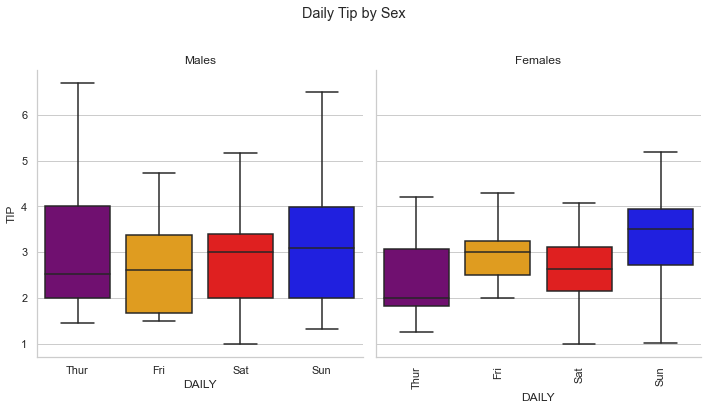

In [17]:
g = sns.catplot(x='day',y='tip',data=tips,kind='box', sym="", col="sex")
g.fig.suptitle("Daily Tip by Sex", y=1.1) #Ana Başlık
g.set_titles("{col_name}s") #Alt Grafik Başlık
g.set(xlabel="DAILY", ylabel="TIP") #Axislerin isimleri
plt.xticks(rotation=90) #Yan döndürme
plt.show() 

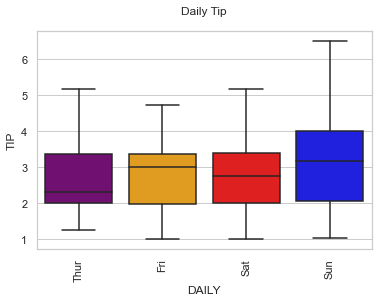

In [18]:
g = sns.boxplot(x='day',y='tip',data=tips, sym="")
g.set_title("Daily Tip", y=1.05) #Ana Başlık
g.set(xlabel="DAILY", ylabel="TIP") #Axislerin isimleri
plt.xticks(rotation=90) #Yan döndürme
plt.show() 

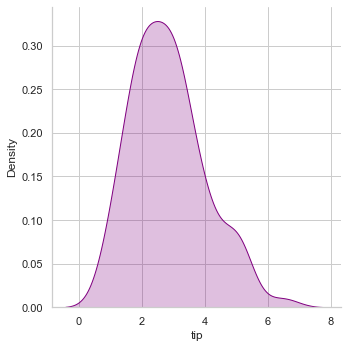

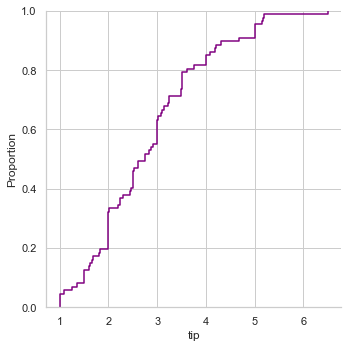

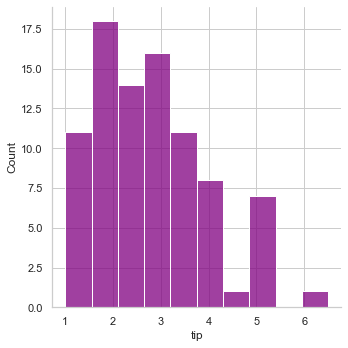

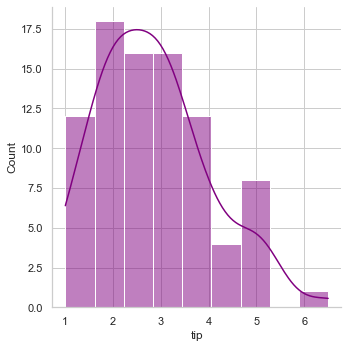

In [19]:
sns.displot(tips[tips['sex'] == "Female"]["tip"],kind='kde', fill=True) #KDE 
sns.displot(tips[tips['sex'] == "Female"]["tip"],kind='ecdf') #CDF 
sns.displot(tips[tips['sex'] == "Female"]["tip"],bins=10) #histogram
sns.displot(tips[tips['sex'] == "Female"]["tip"],kde=True) #histogram ve KDE 

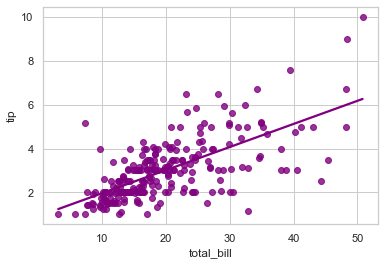

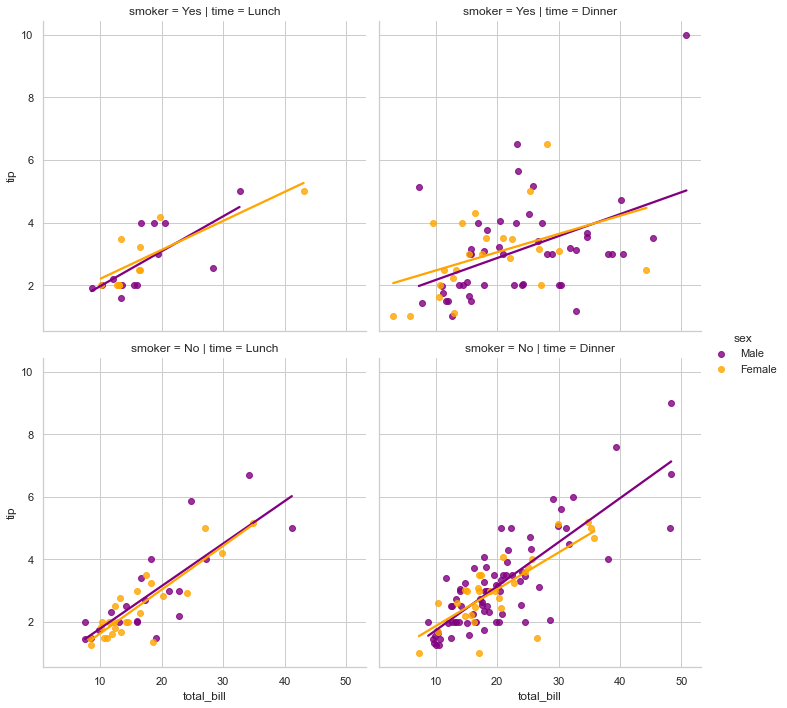

In [20]:
sns.regplot(x="total_bill", y="tip", data=tips, ci=None)
plt.show() #regresyon görselleştirmesi için kullanılır
sns.lmplot(x="total_bill", y="tip", data=tips, ci=None, hue="sex", col="time", row="smoker")
plt.show() #hue ve col kullanımına da izin veriyor

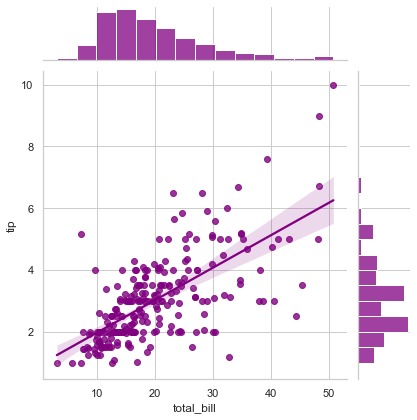

In [21]:
g = sns.JointGrid(data=tips, x="total_bill",y="tip")
g.plot(sns.regplot, sns.histplot)
plt.show()

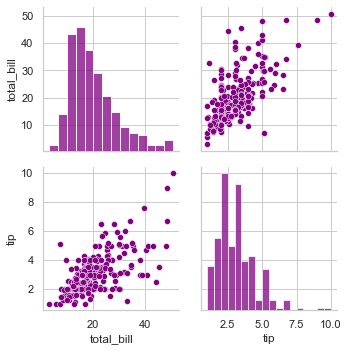

In [22]:
g = sns.PairGrid(tips, vars = ["total_bill","tip"])
g = g.map_diag(sns.histplot)
g = g.map_offdiag(sns.scatterplot) 

In [23]:
rental = pd.read_csv('rental.csv')
rental.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total_rentals
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Text(11, 300000, 'max point')

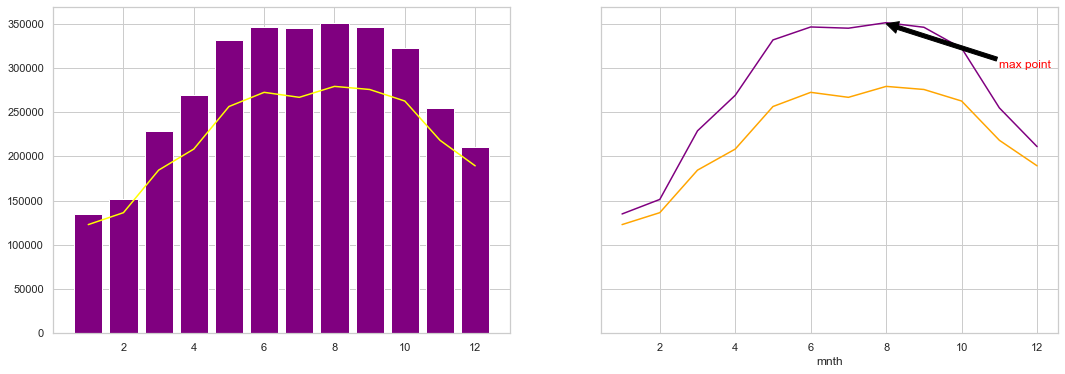

In [24]:
rentals = rental.groupby('mnth')[['total_rentals','registered']].sum().reset_index()

fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(18,6), sharey=True)

ax1.bar(rentals['mnth'], rentals['total_rentals'], color='purple')
#ax3 = ax1.twinx() -> x eksen değerleri aynı y'yi böl
ax1.plot(rentals['mnth'], rentals['registered'], color='yellow')

sns.lineplot(x='mnth',y='total_rentals',data=rentals, ax=ax2)
sns.lineplot(x='mnth',y='registered',data=rentals, ax=ax2)
ax2.annotate("max point", xy=(8,350000), xytext = (11,300000), 
             arrowprops={'color': 'black'},color='red')

#https://matplotlib.org/stable/tutorials/text/annotations.html -> Annotation Features

In [25]:
crosstab = pd.crosstab(rental["mnth"], rental["weekday"], values=rental["total_rentals"], aggfunc="mean").round(0)
crosstab

weekday,0,1,2,3,4,5,6
mnth,,,,,,,
1,1816.0,1927.0,2568.0,2139.0,2513.0,2446.0,1957.0
2,2248.0,2604.0,2824.0,2813.0,2878.0,2933.0,2266.0
3,3301.0,3546.0,3574.0,3670.0,3817.0,3926.0,3939.0
4,4417.0,4516.0,4556.0,4331.0,4764.0,4387.0,4446.0
5,5320.0,4512.0,5025.0,5119.0,5893.0,5751.0,5978.0
6,5940.0,5478.0,5681.0,5701.0,5622.0,5616.0,6344.0
7,5298.0,5792.0,5844.0,5814.0,5624.0,5406.0,5232.0
8,4703.0,5518.0,5930.0,6077.0,6038.0,5958.0,5224.0
9,6160.0,5637.0,5184.0,5668.0,5486.0,5747.0,6394.0


<AxesSubplot:xlabel='weekday', ylabel='mnth'>

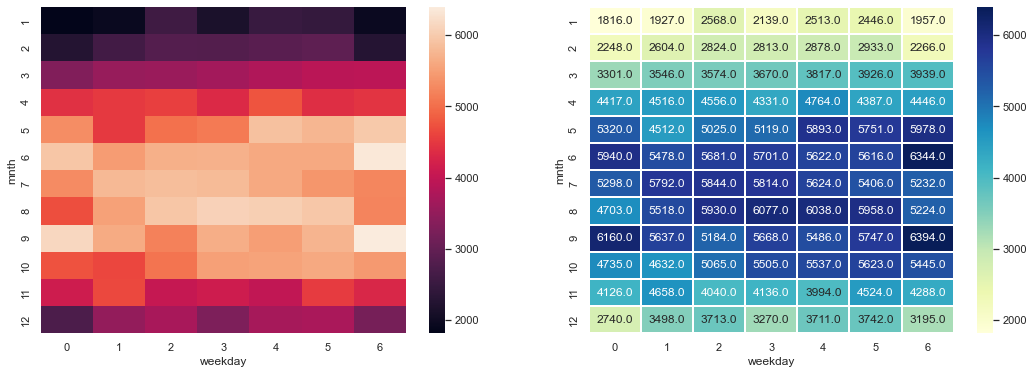

In [26]:
fig, ax = plt.subplots(1,2, figsize=(18,6))

sns.heatmap(crosstab, ax=ax[0]) 
sns.heatmap(crosstab, annot=True, fmt='', cmap = "YlGnBu", cbar=True, linewidths=0.3, ax=ax[1])

#Heat Map with Text Table

#cmap -> Renk
#cbar -> renk skalası göstergesi
#fmt -> integer

<AxesSubplot:>

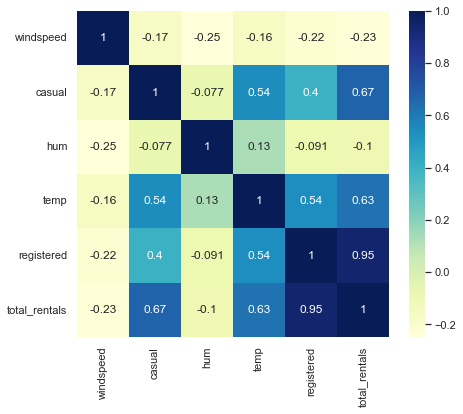

In [27]:
fig, ax =plt.subplots(figsize=(7,6))
columns = ["windspeed","casual","hum","temp","registered","total_rentals"]
sns.heatmap(rental[columns].corr(), cmap="YlGnBu", annot=True)
#Correlation Heat Map 

In [28]:
fig.savefig("correlation_heatmap.jpg") 